# <strong>Métodos Matriciais e Análise de Clusters</strong>

## 04/09/2019

In [197]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift

from scipy.spatial.distance import cdist, pdist

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import homogeneity_completeness_v_measure

pd.set_option('display.float_format', '{:.2f}'.format)

warnings.filterwarnings('ignore')

In [3]:
# Dados categóricos
whisky = "https://www.dropbox.com/s/bf4sf8jdckcgwrz/scotch.csv?dl=1"
telco = "https://www.dropbox.com/s/kh59jmg9rvo5hpc/telco_treino.csv?dl=1"
abalone = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
sponge = "https://archive.ics.uci.edu/ml/machine-learning-databases/sponge/sponge.data"
housing = "https://www.dropbox.com/s/zdbdnnhui9tkj2q/housing_treino.csv?dl=1"

# Dados numéricos
wine = "https://www.dropbox.com/s/iya32vzp81jb8bv/wine_data.csv?dl=1"
movielens = "https://www.dropbox.com/s/ucwh8f86hk2hm6k/ml-1m.csv?dl=1"

In [4]:
def pca_ratio_plot(data, n, perc=False):
    cols = []

    for i in np.arange(1, n + 1):
        cols.append(f'{i}')

    # Gráfico

    width = 0.8

    x = np.arange(data.shape[0])

    fig, ax = plt.subplots(figsize=(16, 8))

    p1 = ax.bar(x, data, width)
    p2 = ax.plot(x, data, ':r')

    ax.set_title('PCA Explained Variance Ratio (%)', fontsize=18)

    ax.set_xticks(x)
    ax.set_xticklabels(cols)
    
    ax.set_xlabel('Principal Components')
    ax.set_ylabel('Percentage')

    autolabel(p1, perc, ax)

    plt.show()

In [5]:
def autolabel(charts, perc=False, ax=None):
    for c in charts:
        height = c.get_height()
        val = '{:.2f}'.format(height) if not perc else '{:.2f}%'.format(height * 100)
        
        ax.annotate(
            val,
            xy=(c.get_x() + c.get_width() / 2, height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

In [92]:
df = pd.read_csv(wine)

In [94]:
df.head()

,Unnamed: 0,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,1,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,1,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,1,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [95]:
df = df.iloc[:, 2:]

In [96]:
scaler = StandardScaler()

X = scaler.fit_transform(df)

In [97]:
pd.DataFrame(X, columns=df.columns).head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.52,-0.56,0.23,-1.17,1.91,0.81,1.03,-0.66,1.22,0.25,0.36,1.85,1.01
1,0.25,-0.50,-0.83,-2.49,0.02,0.57,0.73,-0.82,-0.54,-0.29,0.41,1.11,0.97
2,0.20,0.02,1.11,-0.27,0.09,0.81,1.22,-0.50,2.14,0.27,0.32,0.79,1.40
3,1.69,-0.35,0.49,-0.81,0.93,2.49,1.47,-0.98,1.03,1.19,-0.43,1.18,2.33
4,0.30,0.23,1.84,0.45,1.28,0.81,0.66,0.23,0.40,-0.32,0.36,0.45,-0.04


In [115]:
n_comp = 10

_pca = PCA(n_components=n_comp)

pca = _pca.fit_transform(X)

cols = []

for i in np.arange(1, n_comp + 1):
    cols.append(f'PC{i}')

# Gráfico

width = 0.8

x = np.arange(df_explained_variance.shape[0])

fig, ax = plt.subplots(figsize=(16, 8))

p1 = ax.bar(x, _pca.explained_variance_ratio_, width)
p2 = ax.plot(x, _pca.explained_variance_ratio_, ':r')

ax.set_title('PCA Explained Variance Ratio (%)', fontsize=18)

ax.set_xticks(x)
ax.set_xticklabels(cols)

autolabel(p1, True)

plt.show()

NameError: name 'X' is not defined

In [99]:
df_2 = pd.DataFrame(pca, columns=cols)

df_2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.32,-1.44,-0.17,-0.22,0.69,-0.22,0.60,0.07,0.64,1.02
1,2.21,0.33,-2.03,-0.29,-0.26,-0.93,0.05,1.02,-0.31,0.16
2,2.52,-1.03,0.98,0.72,-0.25,0.55,0.42,-0.34,-1.18,0.11
3,3.76,-2.76,-0.18,0.57,-0.31,0.11,-0.38,0.64,0.05,0.24
4,1.01,-0.87,2.03,-0.41,0.30,-0.41,0.44,0.42,0.33,-0.08


# 05/09/2019

In [93]:
df = pd.read_csv(sponge)

In [94]:
df.shape

(75, 46)

In [95]:
df.head()

,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO.1,NO.2,3,NO.3,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO.12,OTROS,RUGOSA,RADIAL,NO.13,NO.14,NO.15,DURO
0,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
1,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
3,CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
4,CLIONA_SCHMIDTI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 46 columns):
AAPTOS_AAPTOS                        75 non-null object
1_CAPA                               75 non-null object
SIN_CAPA_INTERNA_DEL_CORTEX          75 non-null object
SI                                   75 non-null object
NO                                   75 non-null object
NO.1                                 75 non-null object
NO.2                                 75 non-null object
3                                    75 non-null int64
NO.3                                 75 non-null object
SIN_TILOSTILOS_ADICIONALES           75 non-null object
1_TIPO                               75 non-null object
NO.4                                 75 non-null object
NO.5                                 75 non-null object
NO.6                                 75 non-null object
NO.7                                 75 non-null object
SI.1                                 75 non-null object
NO

## Missing values

In [19]:
(df.isnull().sum() > 0).any()

False

## Dummy

In [96]:
df_dummy = pd.get_dummies(df)

In [97]:
df_dummy.shape

(75, 232)

In [98]:
df_dummy.head()

,3,3.1,0,AAPTOS_AAPTOS_ALECTONA_MILLARI,AAPTOS_AAPTOS_CLIONA_CARTERI,AAPTOS_AAPTOS_CLIONA_CELATA,AAPTOS_AAPTOS_CLIONA_LABYRINTHICA,AAPTOS_AAPTOS_CLIONA_SCHMIDTI,AAPTOS_AAPTOS_CLIONA_VIRIDIS,AAPTOS_AAPTOS_DIPLASTRELLA_BISTELLATA,...,RADIAL_REDUCIDO,NO.13_NO,NO.13_SI,NO.14_NO,NO.14_SI,NO.15_NO,NO.15_SI,DURO_AMBOS,DURO_BLANDO,DURO_DURO
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
2,0,1,3,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1


## Decomposition

In [118]:
n = 50

_pca = PCA(n_components=n)

df_pca = _pca.fit_transform(df_dummy)

In [132]:
print('Proporção acumulada: {}'.format(np.sum(_pca.explained_variance_ratio_[:18])))

Proporção acumulada: 0.8402699543552563


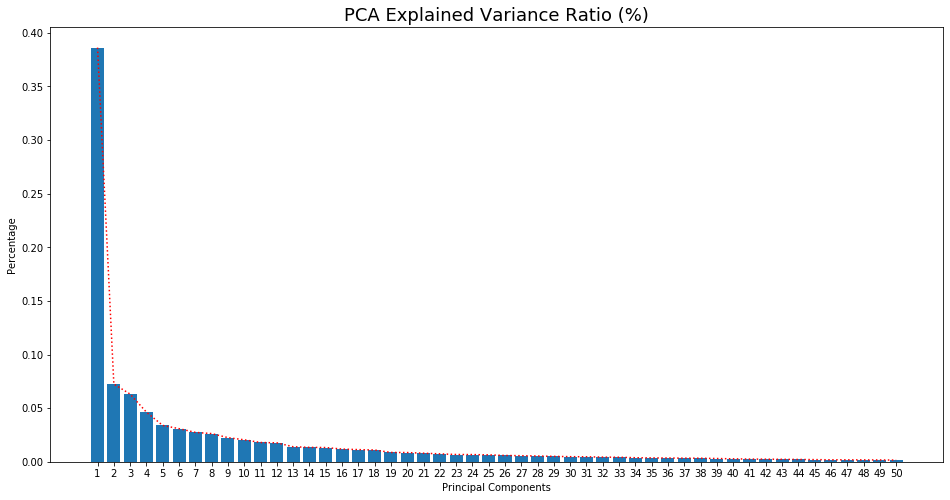

In [127]:
pca_ratio_plot(_pca.explained_variance_ratio_, n, True)

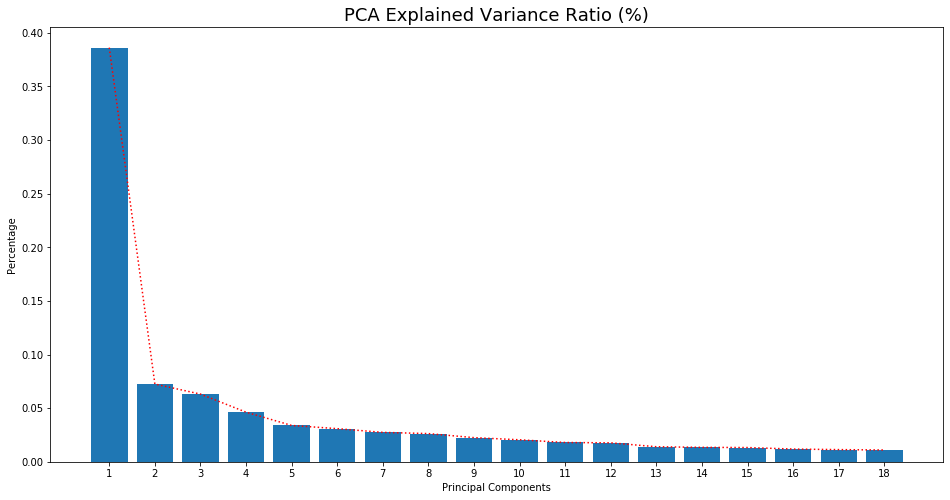

In [134]:
pca_ratio_plot(_pca.explained_variance_ratio_[:18], n, True)

In [297]:
df_reduced = df_pca[:, :18]

## Model

In [281]:
k_means = KMeans()
k_means.fit(df_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Plot das áreas do cluster

In [294]:
x_min, x_max = df_reduced[:, 0].min() - 1, df_reduced[:, 0].max() + 1
y_min, y_max = df_reduced[:, 1].min() - 1, df_reduced[:, 1].max() + 1

xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

In [ ]:
plt.figure(1)

plt.clf()

plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()), 
           cmap = plt.cm.Paired, 
           aspect = 'auto', 
           origin = 'lower')

plt.show()

## Plot dos centróides de cada cluster

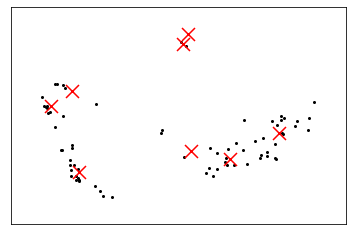

In [298]:
plt.plot(df_reduced[:, 0], df_reduced[:, 1], 'k.', markersize = 4)

centroids = k_means.cluster_centers_

inert = k_means.inertia_

plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

In [211]:
# Determinando um range de K
k_range = range(1, 15)

In [212]:
# Aplicando o modelo K-Means a cada valor de K
k_means_var = [KMeans(n_clusters = k).fit(df_reduced) for k in k_range]

In [213]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [214]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(df_reduced, cent, 'euclidean') for cent in centroids]

dist = [np.min(ke, axis=1) for ke in k_euclid]

In [215]:
# Soma dos quadrados das distâncias dentro do cluster
wcss = [sum(d**2) for d in dist]

In [216]:
# Soma total dos quadrados
tss = sum(pdist(df_reduced)**2) / df_reduced.shape[0]

In [217]:
# Soma dos quadrados entre clusters
bss = tss - wcss

Text(0.5, 1.0, 'Soma da distância ao centróide x Valor de K')

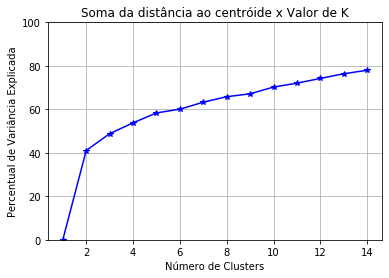

In [218]:
# Curva de Elbow
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(k_range, bss / tss * 100, 'b*-')

ax.set_ylim((0, 100))

plt.grid(True)

plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')

plt.title('Soma da distância ao centróide x Valor de K')

In [258]:
model_2 = KMeans(n_clusters=2)
model_2.fit(df_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [259]:
labels = model_2.labels_
silhouette_score(df_reduced, labels, metric = 'euclidean'), davies_bouldin_score(df_reduced, labels)

(0.36054481608148575, 1.1370601622643672)

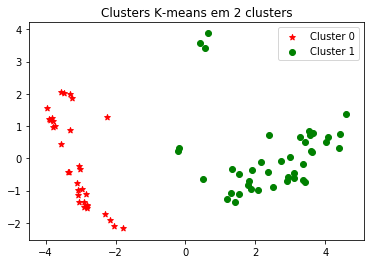

In [299]:
for i in range(0, df_reduced.shape[0]):
    if model_2.labels_[i] == 1:
        c1 = plt.scatter(df_reduced[i, 0], df_reduced[i, 1], c='r', marker='*')
    elif model_2.labels_[i] == 0:
        c2 = plt.scatter(df_reduced[i, 0], df_reduced[i, 1], c='g', marker='o')

        plt.legend([c1, c2], ['Cluster 0', 'Cluster 1'])
        plt.title('Clusters K-means em 2 clusters')

plt.show()

In [ ]:
for i in range(2, 21):
    model = KMeans(n_clusters=i)
    model.fit(df_reduced)
    
    labels = model.labels_
    
    print('Result n_cluster {}:\nSilhouette: {}\nDavies: {}\n'.format(
            i, silhouette_score(df_reduced, labels, metric = 'euclidean'), davies_bouldin_score(df_reduced, labels)
        )
    )

# 11/09/2019

In [6]:
df = pd.read_csv(sponge)

In [9]:
print('Shape of the DataFrame: {}\n'.format(df.shape))

df.head()

Shape of the DataFrame: (75, 46)



,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO.1,NO.2,3,NO.3,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO.12,OTROS,RUGOSA,RADIAL,NO.13,NO.14,NO.15,DURO
0,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
1,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
3,CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
4,CLIONA_SCHMIDTI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO


In [15]:
df_dummy = pd.get_dummies(df)

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummy)

In [18]:
n = 50

_pca = PCA(n_components=n)

df_pca = _pca.fit_transform(df_dummy)

In [19]:
print('Proporção acumulada: {}'.format(np.sum(_pca.explained_variance_ratio_[:18])))

Proporção acumulada: 0.8402699543552563


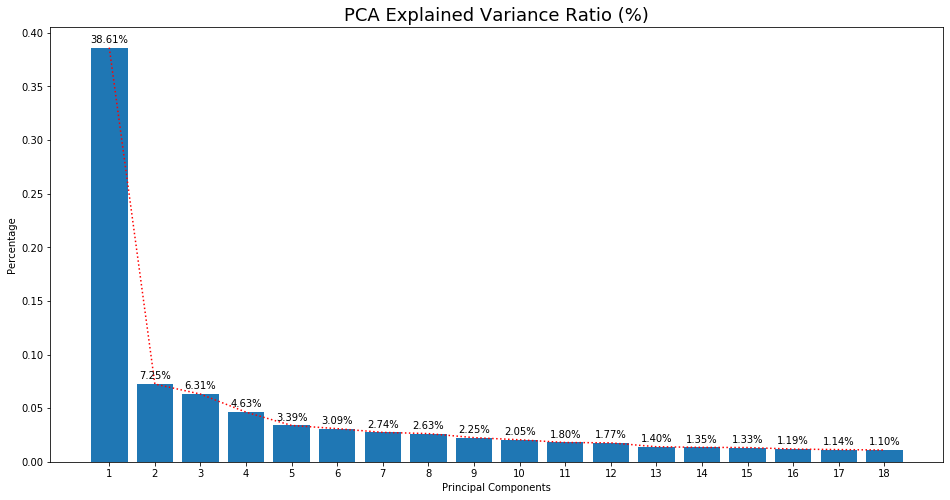

In [20]:
pca_ratio_plot(_pca.explained_variance_ratio_[:18], n, True)

In [21]:
df_reduced = df_pca[:, :18]

Text(0.5, 1.0, 'Soma da distância ao centróide x Valor de K')

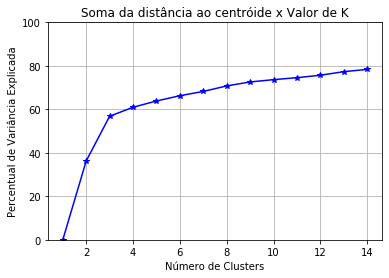

In [108]:
# Determinando um range de K
k_range = range(1, 15)

# Aplicando o modelo K-Means a cada valor de K
k_means_var = [KMeans(n_clusters = k).fit(df_reduced) for k in k_range]

# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(df_reduced, cent, 'euclidean') for cent in centroids]

dist = [np.min(ke, axis=1) for ke in k_euclid]

# Soma dos quadrados das distâncias dentro do cluster
wcss = [sum(d**2) for d in dist]

# Soma total dos quadrados
tss = sum(pdist(df_reduced)**2) / df_reduced.shape[0]

# Soma dos quadrados entre clusters
bss = tss - wcss

# Curva de Elbow
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(k_range, bss / tss * 100, 'b*-')

ax.set_ylim((0, 100))

plt.grid(True)

plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')

plt.title('Soma da distância ao centróide x Valor de K')

### KMeans

In [109]:
cltr_1 = KMeans(n_clusters=3)
cltr_1.fit(df_reduced)

labels = cltr_1.labels_

silhouette_score(df_reduced, labels, metric = 'euclidean'), davies_bouldin_score(df_reduced, labels)

(0.3712457286688806, 1.1020687749133353)

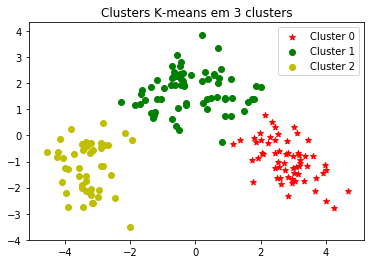

In [147]:
for i in range(0, df_reduced.shape[0]):
    if cltr_1.labels_[i] == 1:
        c1 = plt.scatter(df_reduced[i, 0], df_reduced[i, 1], c='r', marker='*')
    elif cltr_1.labels_[i] == 0:
        c2 = plt.scatter(df_reduced[i, 0], df_reduced[i, 1], c='g', marker='o')
    elif cltr_1.labels_[i] == 2:
        c3 = plt.scatter(df_reduced[i, 0], df_reduced[i, 1], c='y', marker='o')

        plt.legend([c1, c2, c3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])
        plt.title('Clusters K-means em 3 clusters')

plt.show()

### DBSCAN

In [161]:
cltr_2 = DBSCAN(eps=3, min_samples=50).fit(df_reduced)
cltr_2

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=None, p=None)

In [162]:
labels = cltr_2.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,
        0, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

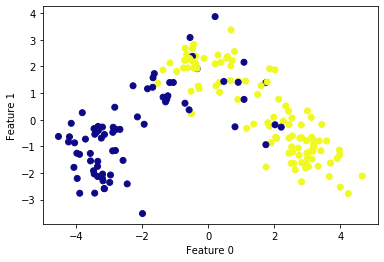

In [163]:
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=labels, cmap='plasma')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.show()

In [164]:
silhouette_score(df_reduced, labels, metric = 'euclidean'), davies_bouldin_score(df_reduced, labels)

(0.28826550601821616, 1.4889295533522526)

# 12/09/2019

Continuação dos exercícios anteriores

## Agglomerative

In [35]:
X = df_reduced

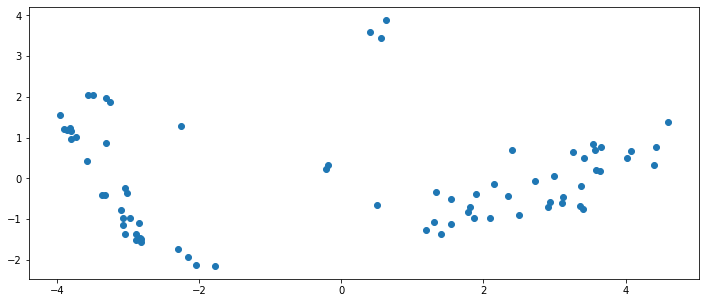

In [41]:
plt.figure(figsize=(12, 5))

plt.scatter(X[:, 0], X[:, 1])

plt.show()

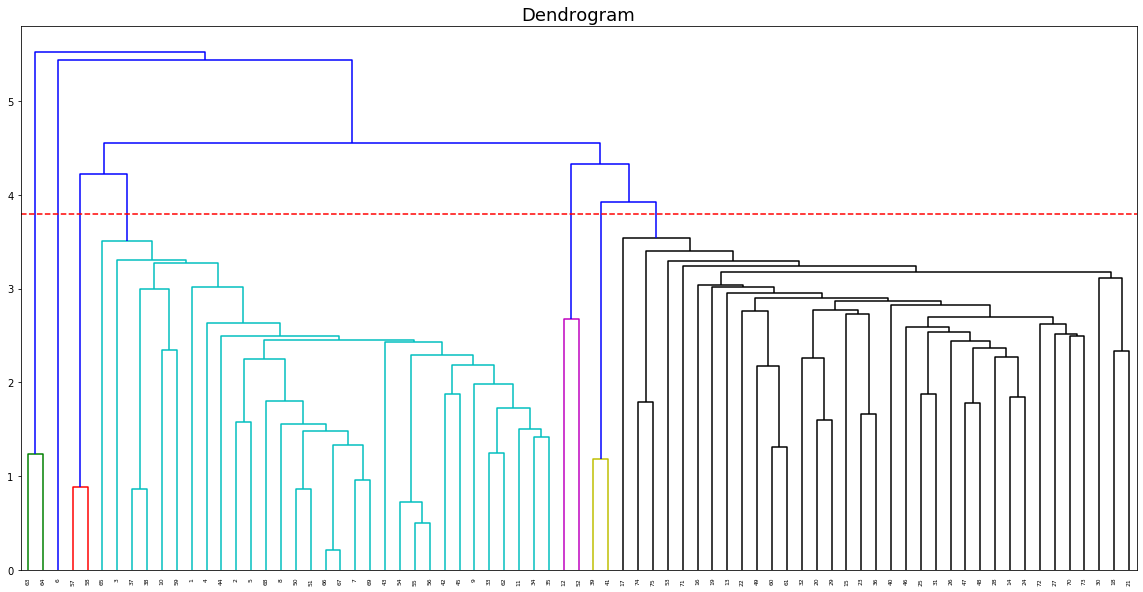

In [176]:
linked = linkage(X, 'single')

label_list = range(1, X.shape[0] + 1)

plt.figure(figsize=(20, 10))

dendrogram(
    linked,
    orientation='top',
    labels=label_list,
    distance_sort='descending',
    show_leaf_counts=True
)

plt.axhline(y=3.8, color='r', linestyle='--')

plt.title('Dendrogram', fontsize=18)

plt.show()

In [108]:
linkages = ['ward', 'complete', 'average', 'single']
affinities = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']

In [200]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')

In [201]:
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [202]:
labels = cluster.labels_

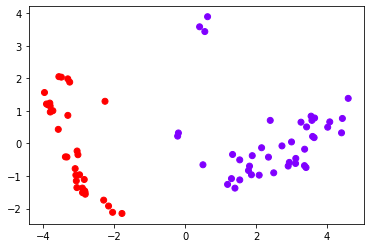

In [203]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.36054481608148575
For n_clusters = 3 The average silhouette_score is : 0.2695576501613506
For n_clusters = 4 The average silhouette_score is : 0.19892131658080955
For n_clusters = 5 The average silhouette_score is : 0.2095485170309044
For n_clusters = 6 The average silhouette_score is : 0.21460124756427826
For n_clusters = 7 The average silhouette_score is : 0.20206113401611


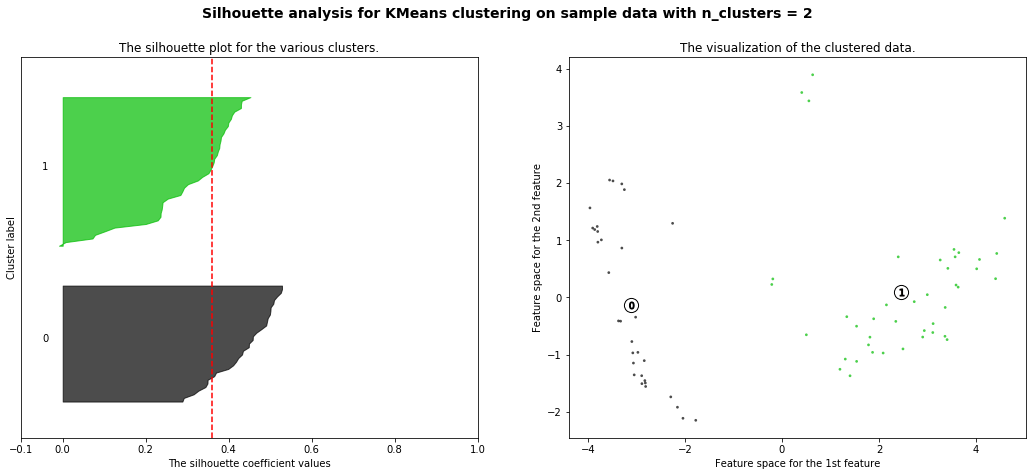

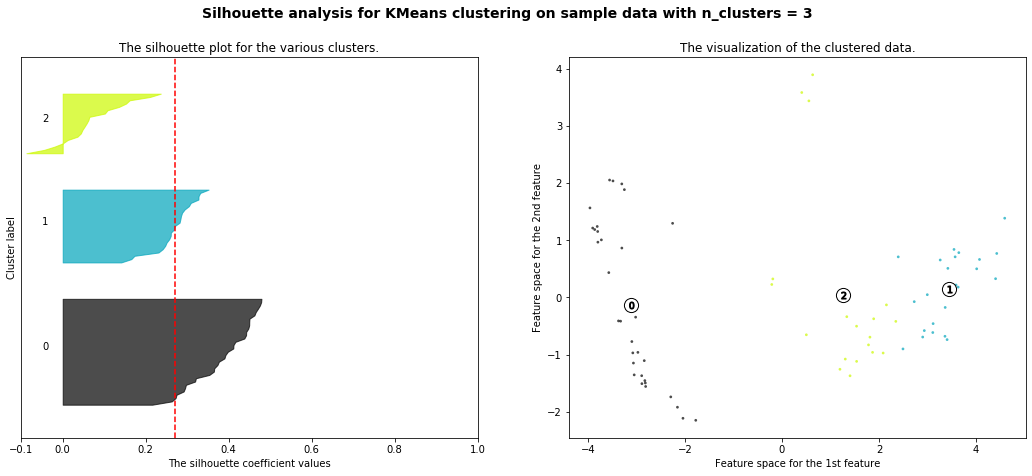

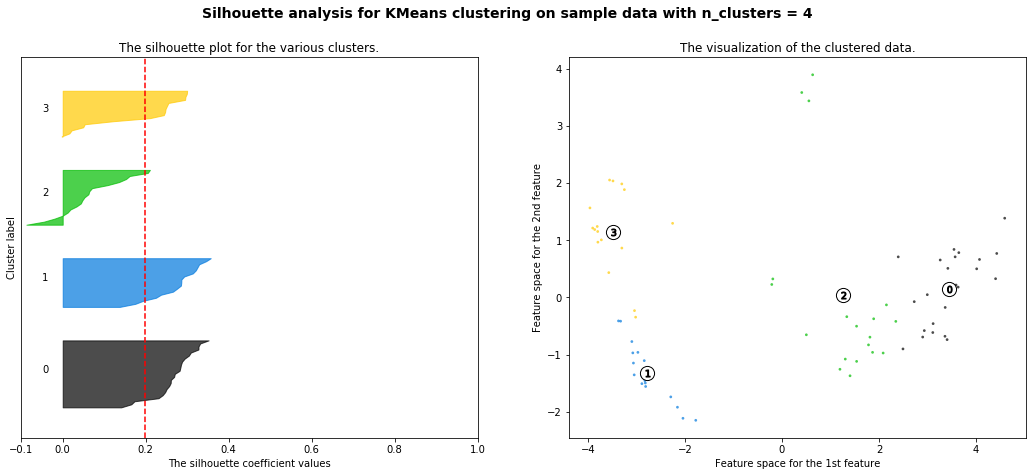

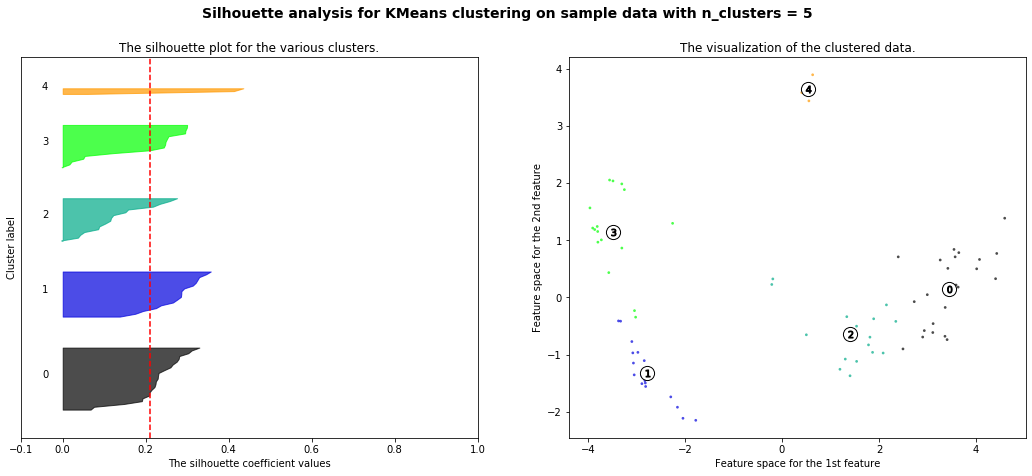

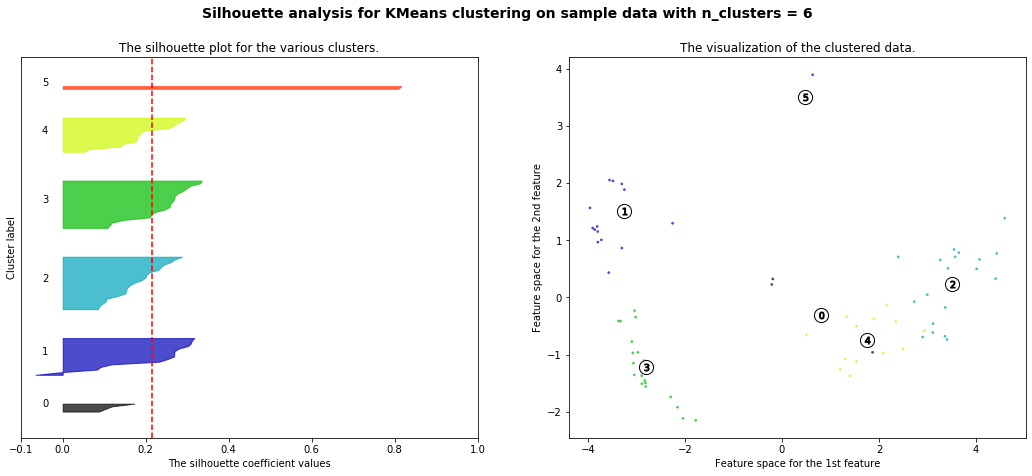

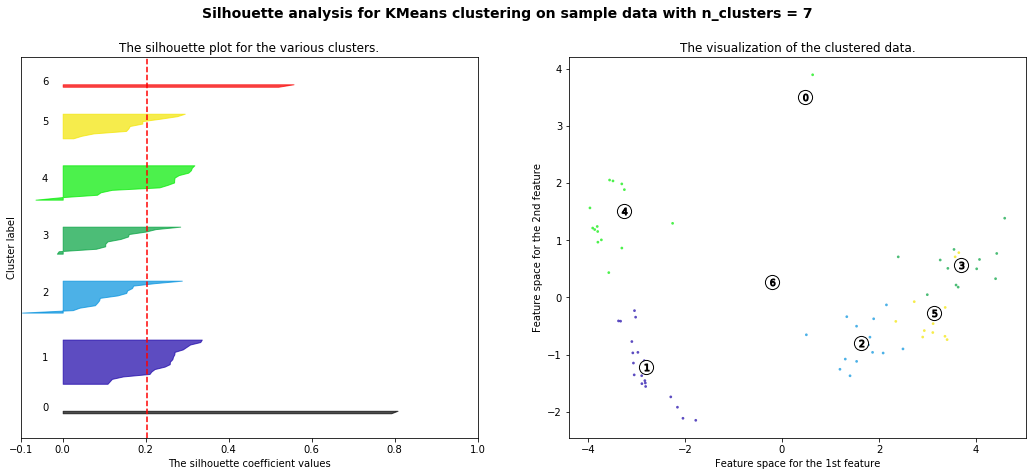

In [199]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.36054481608148575
For n_clusters = 3 The average silhouette_score is : 0.2695576501613506
For n_clusters = 4 The average silhouette_score is : 0.19892131658080955
For n_clusters = 5 The average silhouette_score is : 0.2095485170309044
For n_clusters = 6 The average silhouette_score is : 0.21460124756427826
For n_clusters = 7 The average silhouette_score is : 0.20206113401611
For n_clusters = 8 The average silhouette_score is : 0.18787892013736457
For n_clusters = 9 The average silhouette_score is : 0.20633008828776409
For n_clusters = 10 The average silhouette_score is : 0.21579988492797797


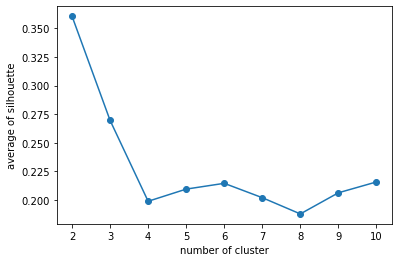

In [224]:
cv_results = []

for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    cv_results.append(silhouette_avg)

# plt.subplot(2, 1, 1)
plt.plot(range(2, 11), np.array(cv_results), 'o-')

plt.xlabel('number of cluster')
plt.ylabel('average of silhouette')

plt.show()